In [1]:
# Load necessary libraries
library(ADM)
source("./functions.R")

Loading required package: Matrix


Attaching package: ‘uwot’


The following object is masked from ‘package:umap’:

    umap


Loading required package: MASS

Loading required package: survival


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:igraph’:

    crossing


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The follo

In [2]:
# Set dataset name
dataset = "Gutierrez"  # Options: Gutierrez, Oihane, Quake, Brain5k, mir, Spleen, metabolism, gene

# Load data
dataload = dataloader(dataset)
dat = dataload$dat
info = dataload$info
k = length(unique(info))
label_mapping <- get_mapping(dataset)
print("load data successfully!")

# Execute candidate visualization methods
candidate.out = candidate.visual(dat, dim = 3, method=c("PCA", "MDS", "iMDS", "Sammon", "HLLE", "Isomap", 
                                                  "kPCA", "LEIM", "UMAP", "tSNE","PHATE","KEF"),tsne.perplexity = c(10, 30))

print("Indivadual methods completed!!")
# Extract results
e<-candidate.out[[1]]  # Visualization results
names_list = candidate.out[[2]]  # List of method names

[1] "load data successfully!"
[1] 2036  662
[1] "PCA calculating..."
[1] "MDS calculating..."
[1] "iMDS calculating..."
initial  value 39.528540 
iter   5 value 29.976745
iter  10 value 27.432130
iter  15 value 26.502621
final  value 26.232591 
converged
[1] "Sammon calculating..."
Initial stress        : 0.63958
stress after   2 iters: 0.58534
[1] "HLLE calculating..."


2024-10-16 17:37:46.687437: Finding nearest neighbors

2024-10-16 17:37:49.422271: Calculating Hessian



'as(<dsCMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "generalMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").

2024-10-16 17:38:00.105699: Embedding

Eigenvalues: 4.849175e-02 4.432532e-02 3.498523e-02 7.254312e-16

2024-10-16 17:38:00.188385: DONE



[1] "Isomap calculating..."


2024-10-16 17:38:00.220187: Isomap START

2024-10-16 17:38:00.224206: constructing knn graph

2024-10-16 17:38:03.128593: calculating geodesic distances

2024-10-16 17:38:05.324839: Classical Scaling



[1] "kPCA calculating..."


2024-10-16 17:38:05.461757: Calculating kernel PCA

2024-10-16 17:38:09.08066: Trying to calculate reverse

2024-10-16 17:38:16.208103: DONE



[1] "kPCA calculating..."


2024-10-16 17:38:16.231392: Calculating kernel PCA

2024-10-16 17:38:20.052976: Trying to calculate reverse

2024-10-16 17:38:27.133873: DONE



[1] "LEIM calculating..."


2024-10-16 17:38:27.156307: Creating weight matrix

2024-10-16 17:38:30.092554: Eigenvalue decomposition

Eigenvalues: 7.203345e-01 6.357867e-01 3.692023e-01 3.282879e-16

2024-10-16 17:38:30.40596: DONE



[1] "UMAP calculating..."
[1] "UMAP calculating..."
[1] "tSNE calculating..."
[1] "tSNE calculating..."
[1] "PHATE calculating..."
[1] "PHATE calculating..."
[1] "KEF calculating..."
NULL
[1] "Indivadual methods completed!!"


In [3]:
# set.seed(2024)
# Execute meta-spec visualization
ensemble.out = ensemble.viz(e, names(e))
print("meta-spec completed!!")

[1] "1000 samples done!"
[1] "2000 samples done!"
[1] "meta-spec completed!!"


In [4]:
# Execute ADM method
adm.out = adm(e,distr.template = "combine")
print("ADM completed!!")

[1] "working on ADM..."


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Buildi

[1] "ADM completed!!"


In [5]:
# Define color list for visualization
color_list =c("#FB6A4A","#54278F","#006635","#3182BD","#DE2D26","#72A34F","#5D7AD3", "#756BB1","#FCAE91","#fe87ac","#AFABAB","#67A9CF","#CBC9E2","#4d982e","#E6873E","#545454","#aa3474","#ee8c7d","#2e5fa1","#FDD0A3","#C22F2F","#036f73")

# Process and visualize meta-method results
result = process_and_visualize_meta_methods(adm.out, ensemble.out,info, k, color_list)

[1] "Running R version:4.3.1"
****** meta-spec ******
        ARI       NMI
1 0.2145945 0.2956548
****** ADM ******
        ARI       NMI
1 0.2272438 0.3070992


In [6]:
result$ARI_list

[[1]]
        ARI       NMI
1 0.2145945 0.2956548

[[2]]
        ARI       NMI
1 0.2272438 0.3070992

[[1]]

[[2]]
NULL

[[3]]


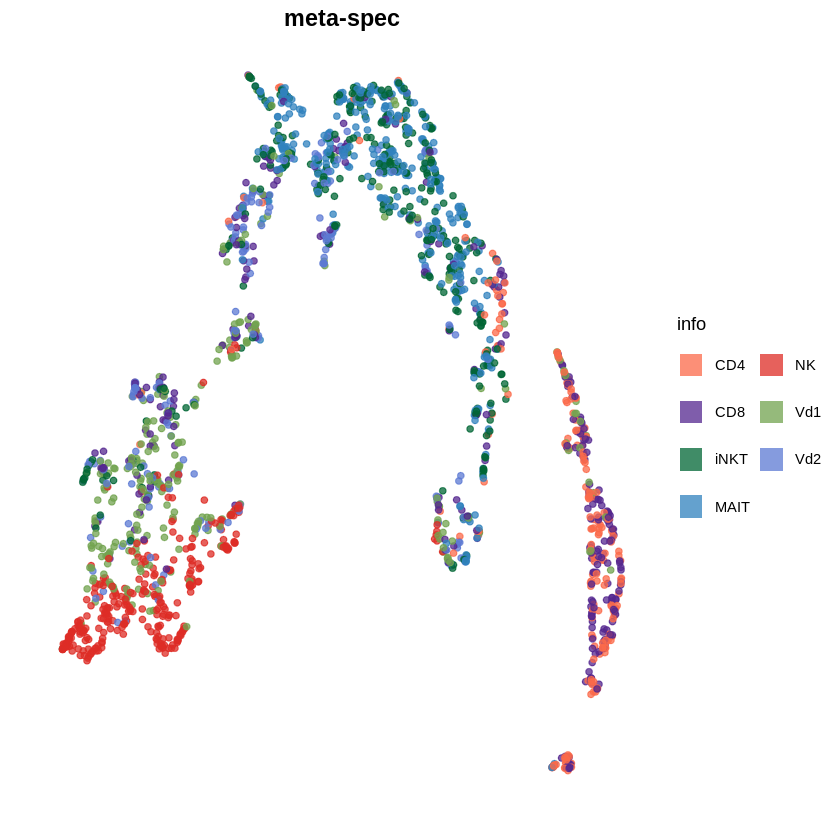

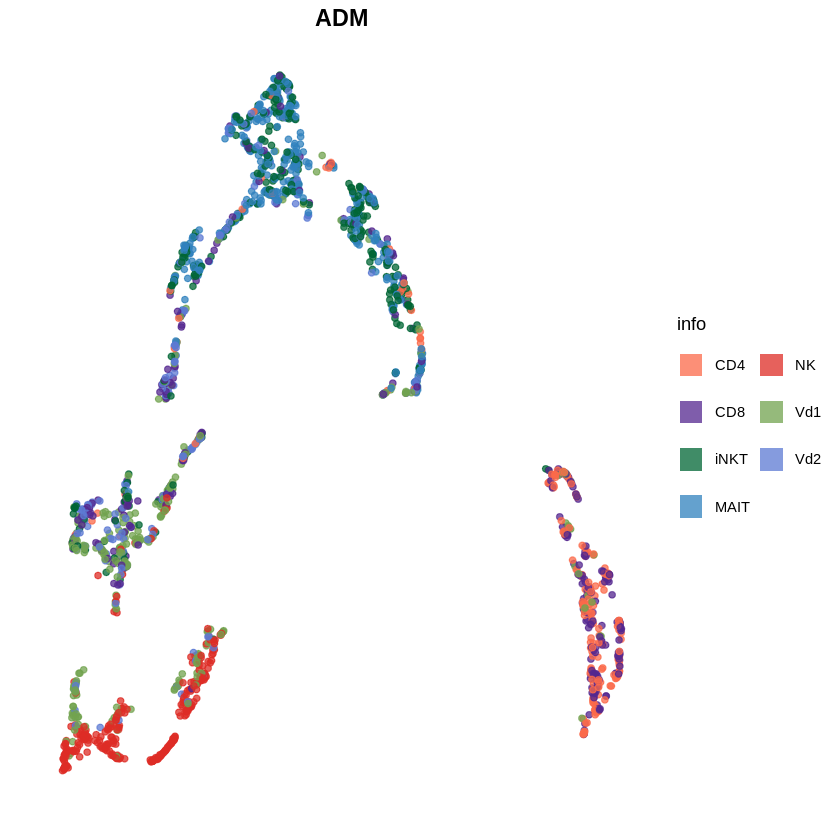

In [7]:
result$plot

****** PCA ******
        ARI       NMI
1 0.2398969 0.3486743
Average Silhouette Width: 0.4183827 

****** MDS ******
        ARI       NMI
1 0.2192474 0.3083315
Average Silhouette Width: 0.3032067 



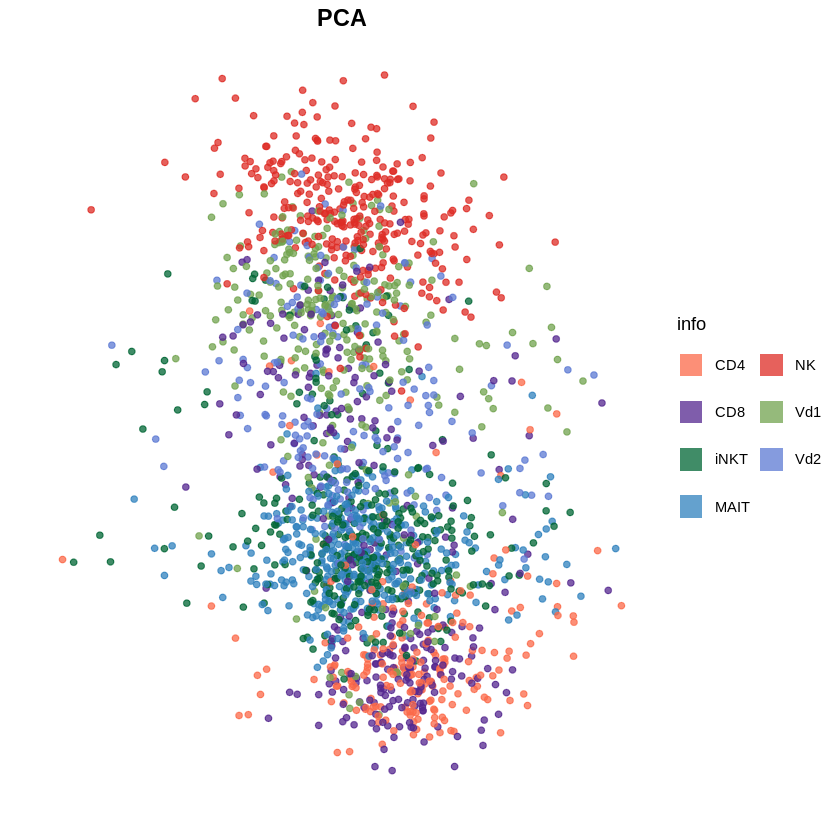

****** iMDS ******
       ARI      NMI
1 0.143363 0.228812
Average Silhouette Width: 0.245892 



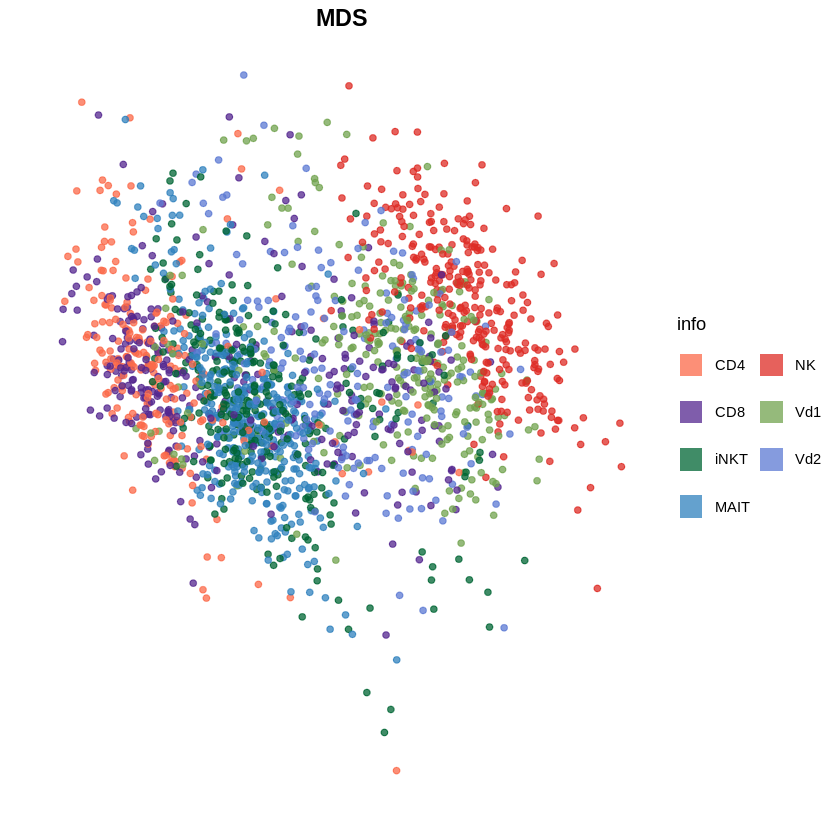

****** Sammon ******
        ARI       NMI
1 0.2584284 0.2993107
Average Silhouette Width: 0.3908258 



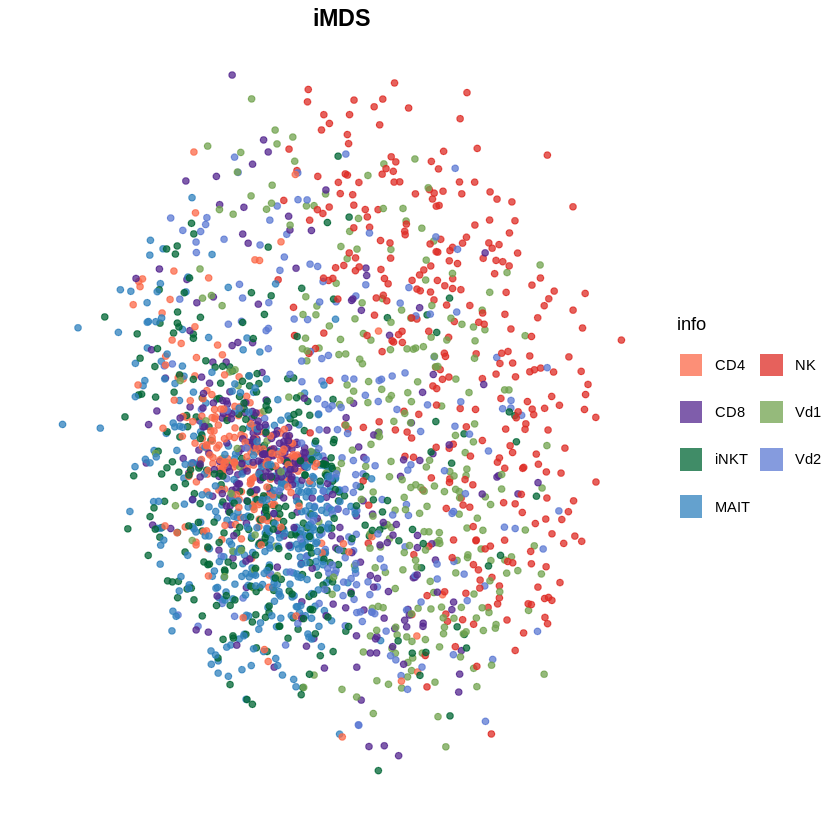

****** HLLE ******
        ARI       NMI
1 0.1147864 0.1500758
Average Silhouette Width: 0.5835743 



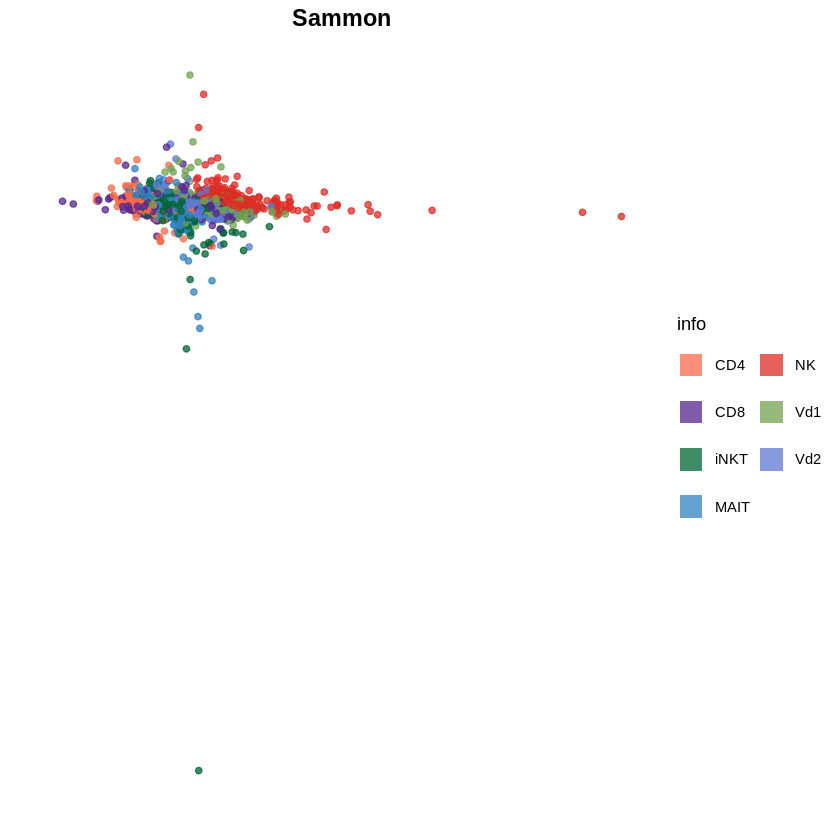

****** Isomap ******
         ARI       NMI
1 0.06645636 0.1011506
Average Silhouette Width: 0.3760569 



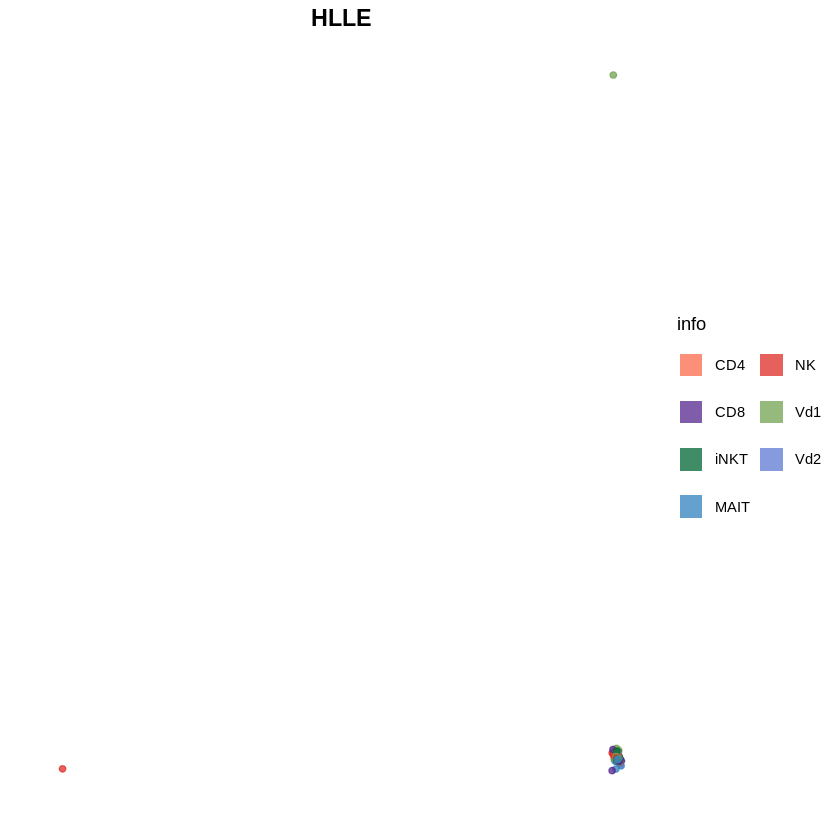

****** kPCA1 ******
        ARI       NMI
1 0.2178495 0.3069629
Average Silhouette Width: 0.3033881 



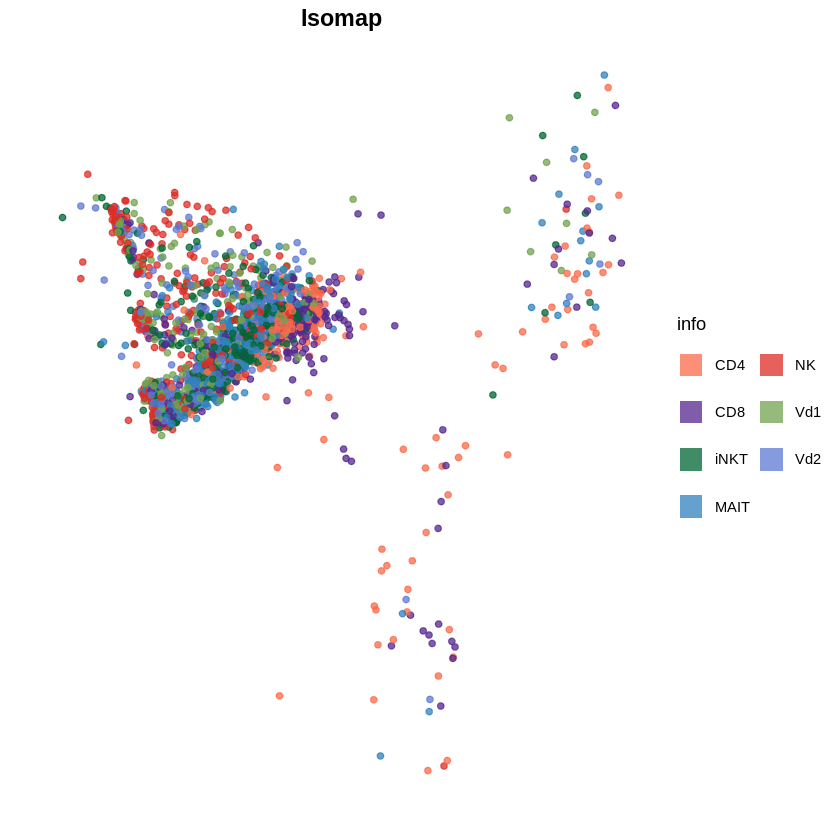

****** kPCA2 ******
        ARI       NMI
1 0.2176679 0.3074863
Average Silhouette Width: 0.3026827 



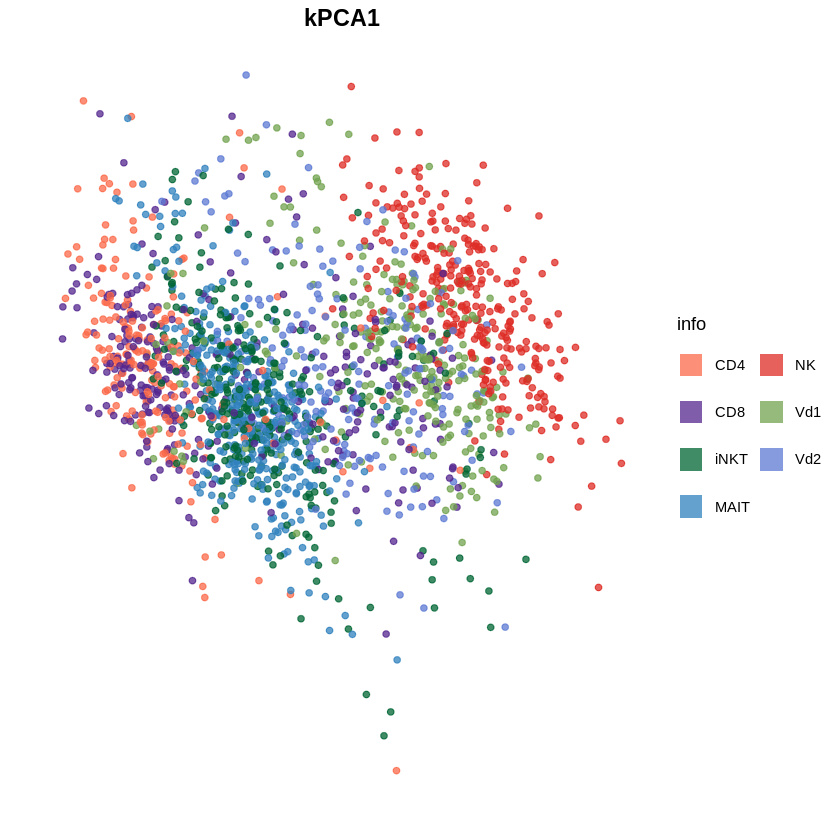

****** LEIM ******
        ARI       NMI
1 0.1065415 0.1720511
Average Silhouette Width: 0.2853586 



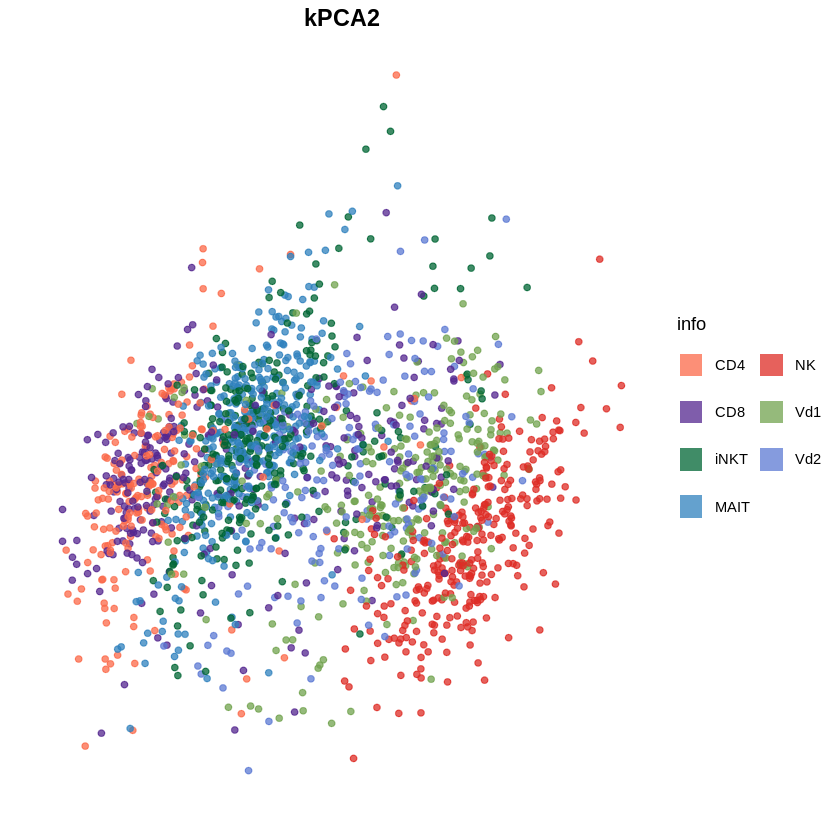

****** UMAP1 ******
         ARI        NMI
1 0.05047193 0.08233595
Average Silhouette Width: 0.3073849 



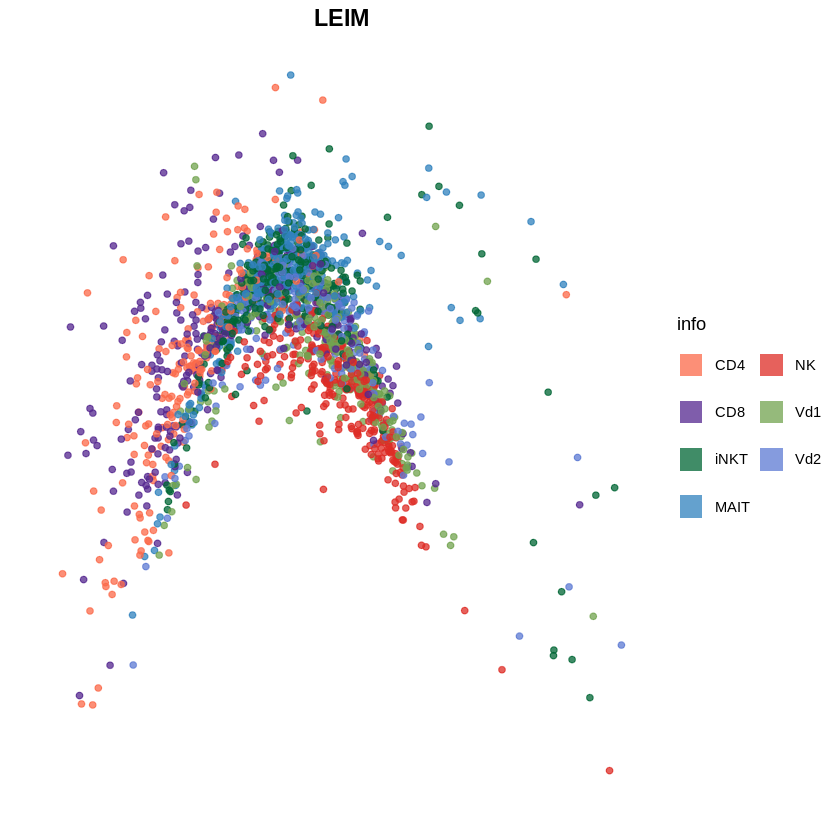

****** UMAP2 ******
         ARI        NMI
1 0.05592534 0.08544304
Average Silhouette Width: 0.3029798 



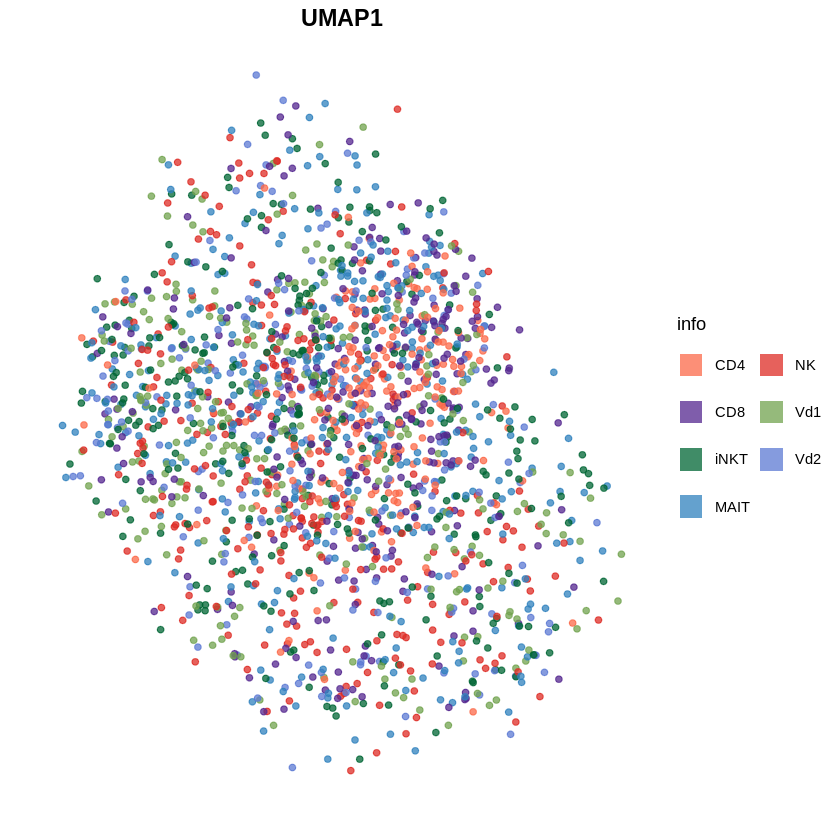

****** tSNE1 ******
         ARI       NMI
1 0.06888303 0.1018583
Average Silhouette Width: 0.2252323 



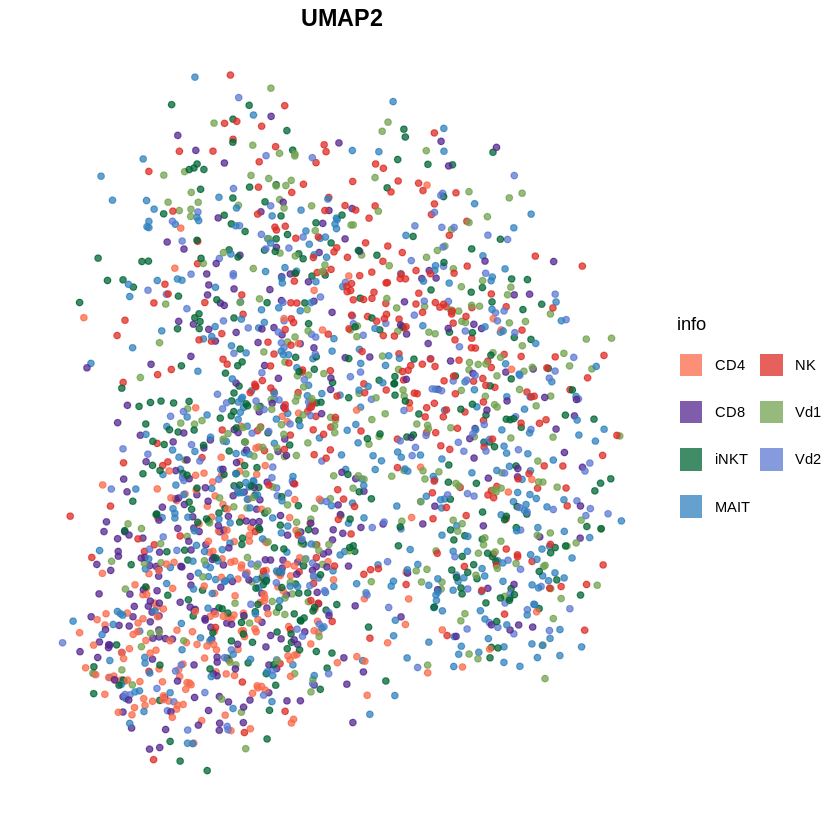

****** tSNE2 ******
         ARI       NMI
1 0.08099328 0.1213495
Average Silhouette Width: 0.2340796 



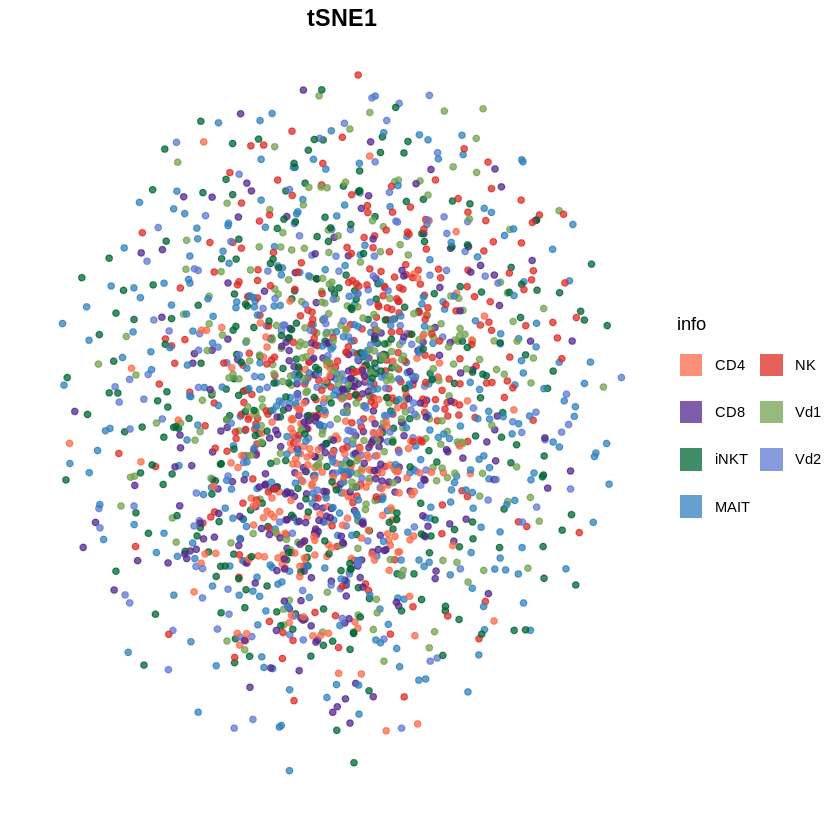

****** PHATE1 ******
        ARI       NMI
1 0.2145997 0.2937896
Average Silhouette Width: 0.5050249 



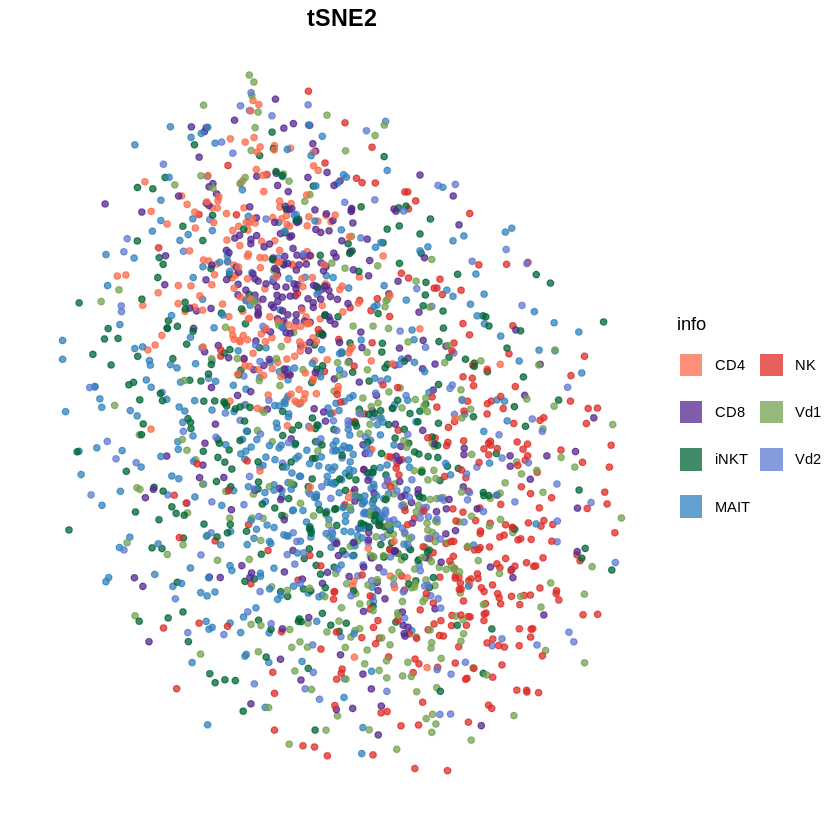

****** PHATE2 ******
        ARI       NMI
1 0.2190677 0.3007246
Average Silhouette Width: 0.5281544 



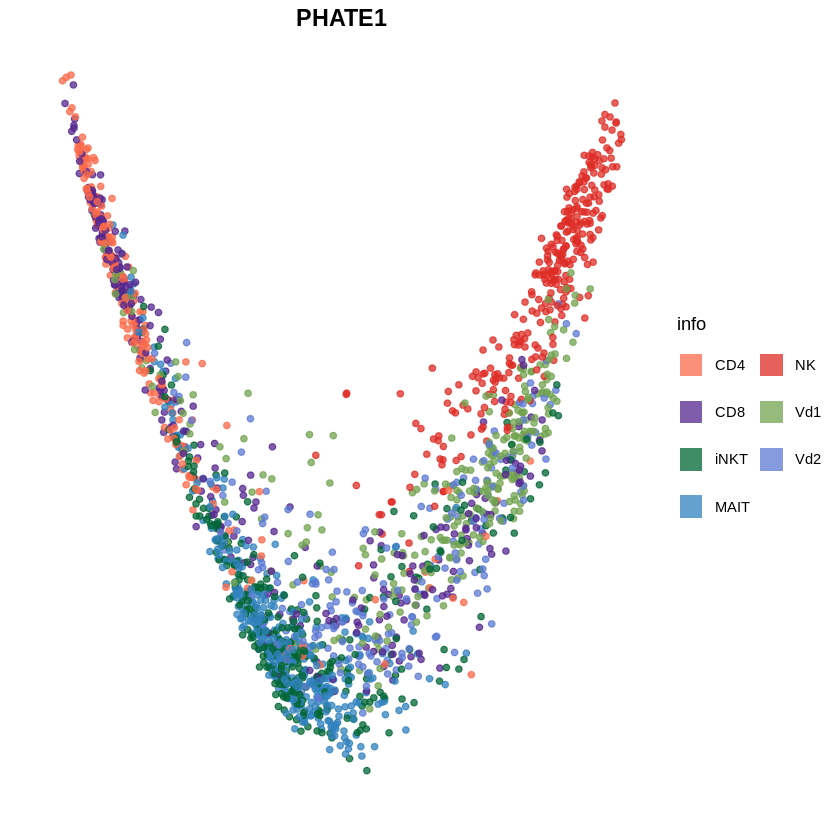

****** KEF ******
        ARI       NMI
1 0.1878194 0.2727763
Average Silhouette Width: 0.3298457 



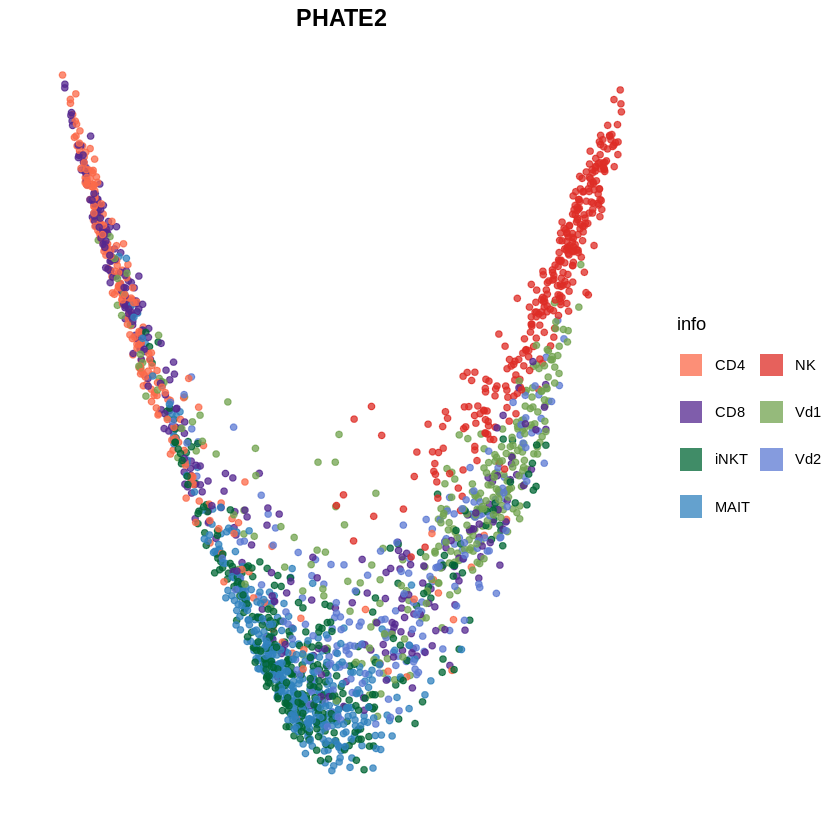

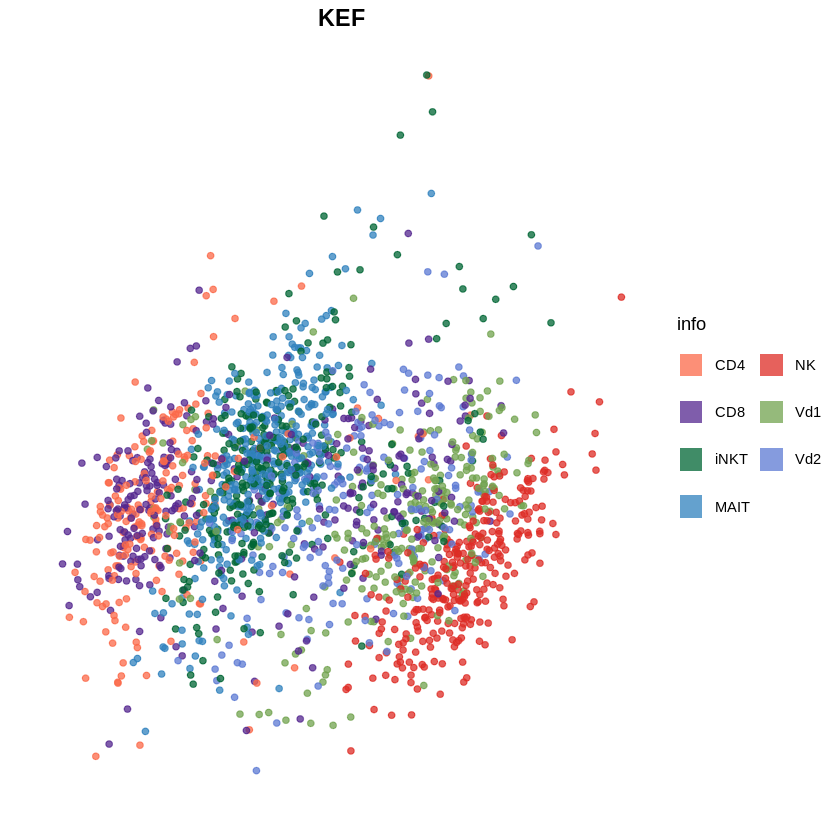

In [8]:
# Visualize individual method results
ind_result = visualize_individual_methods(e, names_list, info, color_list, k)

$plot

$ari
[1] 0.2398969

$nmi
[1] 0.3486743

$silhouette
[1] 0.4183827


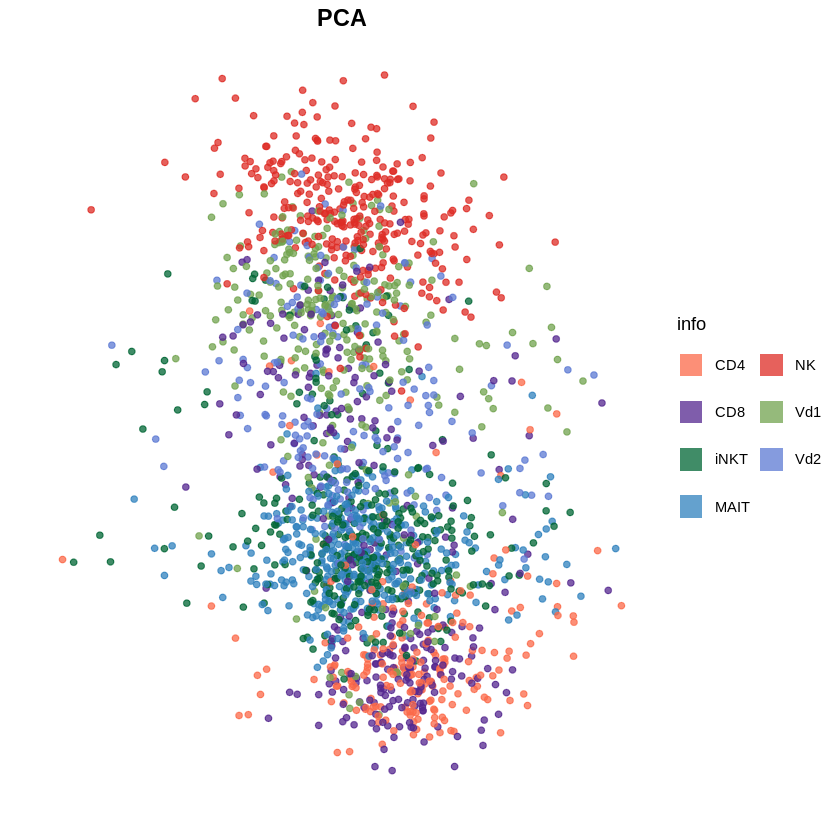

In [9]:
# View results
# Use the following commands to view numerical results and plots for each method:
# ind_result[[1]]$plot  # Plot
# ind_result[[1]]$ari   # ARI value
# ind_result[[1]]$nmi   # NMI value
# ind_result[[1]]$silhouette  # Silhouette coefficient

ind_result[[1]]

In [10]:
cci = cal_cci(ensemble.out, adm.out, info)

In [13]:
cci

[[1]]
     n_neighbors   viz_raw  viz_umap   viz_pca
[1,]           1 0.4572692 0.4234774 0.3993124
[2,]           2 0.4580059 0.4242633 0.3968566
[3,]           5 0.4506876 0.4189194 0.3958743
[4,]          10 0.4446464 0.4195383 0.3972004
[5,]          20 0.4359528 0.4152210 0.3966601

[[2]]
     n_neighbors   adm_raw  adm_umap   adm_pca
[1,]           1 0.4611984 0.4472495 0.4474460
[2,]           2 0.4695481 0.4467092 0.4422888
[3,]           5 0.4682711 0.4434774 0.4335953
[4,]          10 0.4571709 0.4352947 0.4319253
[5,]          20 0.4485511 0.4306385 0.4290275